# Problem 16
Estimate bubble point pressure with modified Wilson correlation with 3 component mixture defined in Problem 15
* Note the tabulated and reported results for this are confusing in the example as it appears that convergence pressure pk has been inadverdantly substituted for bubble point pressure. The actual problem ASSUMES pk = 2,000 psia (per Problem 15), and seeks to find the pressure at which Eq 3.165 is satisfied (being the bubble point pressure)

In [1]:
import math
from tabulate import tabulate
R = 10.73146 # Universal gas constant, psia-ft3/R-lbm mol

In [32]:
# Per Table B-18 and B-19
comps = ['C1', 'C2', 'nC5']
z = [0.20, 0.32, 0.48]
pc = [667.8, 616.3, 488.6]
tc = [343.0, 665.7, 845.4]
w = [0.0115, 0.1454, 0.251]

# As specified by problem scenario
pk = 2000 # Convergence pressure psia 
p = 500 # psia
t = 160 # deg F
A2 = 0.7 # problem characterizes this as A0, but I assume this is a misprint as A0 doesn't factor into these equations
pb = 2000

In [11]:
# Setup a function we can call for the modified Wilson correlation
def k_mod_wilson(w, tc, pc, t, p, pk, A2):
    A1 = 1-((p-14.7)/(pk-14.7))**A2 # Eq 3.160 - assuming pressures given in psia, Eq 3.160 is in terms of psig
    tr = t/tc
    pr = p/pc
    return (pc/pk)**(A1-1)*math.exp(5.37*A1*(1+w)*(1-1/tr))/pr # Eq 3.159

In [12]:
# Calculate all the Ki's
ncomps = len(comps)
K = [k_mod_wilson(w[i], tc[i], pc[i], t+460, p, pk, A2) for i in range(ncomps)]

In [53]:
def Fpbub(pbub, *args):
    w, tc, pc, t, pk, A2 = args
    ncomps = len(w)
    K = [k_mod_wilson(w[i], tc[i], pc[i], t+460, pbub, pk, A2) for i in range(ncomps)]
    return 1 - sum((z[i]*K[i]) for i in range(ncomps)) # Eq 3.165

In [54]:
from scipy.optimize import brentq
# Calculate bubble point pressure consistent with specified convergence pressure pk
data = (w, tc, pc, t, pk, A2)
pbub = brentq(Fpbub,14.8,pk-1, args = data) # Use SciPy Python solver Brentq instead of Newton iterations, between standard conditions pressure and 1psi less than pk (Pbub = pk is trivial solution)

K = [k_mod_wilson(w[i], tc[i], pc[i], t+460, pbub, pk, A2) for i in range(ncomps)]
y = [K[i]*z[i] for i in range(ncomps)]

# And print out summary
print('Table B-22 Pressure Guess Calculations (Problem 16)\n')
print('Bubble Point Pressure =', round(pbub,1),'psia\n')
header=['Component', 'zi', 'Ki', 'yi',]
table = []
for i in range(ncomps):
    table.append([comps[i], z[i], round(K[i],4), round(y[i],4)])
table.append(['Total', sum(z), '1-Sum(yi):', 1-sum(y) ])
print(tabulate(table,headers=header))

Table B-22 Pressure Guess Calculations (Problem 16)

Bubble Point Pressure = 1375.1 psia

Component      zi  Ki                   yi
-----------  ----  ----------  -----------
C1           0.2   1.9815      0.3963
C2           0.32  0.9956      0.3186
nC5          0.48  0.594       0.2851
Total        1     1-Sum(yi):  2.22045e-16


*Note how Pbub has two solutions. The upper Pbub = pk is the trivial solution for when all Ki's = 1, hence why we set upper search range to 1psi less than pk*

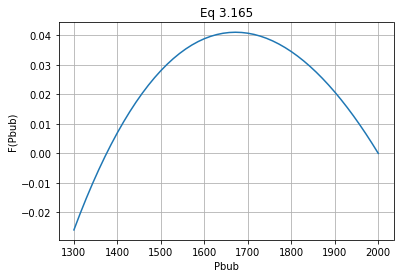

In [55]:
# Plot the associated Eq 3.165 Plot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pbub = np.linspace(1300,2000)
plt.plot(pbub,[Fpbub(pbub, *data) for pbub in pbub])
plt.xlabel('Pbub')
plt.ylabel('F(Pbub)')
plt.title("Eq 3.165")
plt.grid();